##Alzheimer's Disease Prediction Using ADNI data
##Charlee Cobb | cac9995
##Machine Learning Final

The target of the data is the clinical diagnosis made during clinical visits. There are five categories of diagnosis: Cognative Normal (CN), Significant Memory Concern (SMC), Early Mild Cognitive Impairment (EMCI), Late Mild Cognitive Impairment(LMCI), and Alzheimer's Disease (AD). Mild Cognitive Impairment(MCI) is another measurement used in ADNI data, but it does not appear in this data set.  

In [4]:
#load the data
#importing ADNI dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import numpy as np

df_adnimergedata = pd.DataFrame(pd.read_csv("/content/drive/MyDrive/Machine Learning/ADNI_adnimerge_20170629_QT-freeze_adjusted_ints - ADNI_adnimerge_20170629_QT-freeze.csv"))
df_adnimergedata.head

#getting list of column names
col_names = df_adnimergedata.columns
col_names

Index(['RID', 'VISCODE', 'COLPROT', 'ORIGPROT', 'EXAMDATE', 'DX.bl', 'AGE',
       'PTGENDER', 'PTEDUCAT', 'PTETHCAT', 'PTRACCAT', 'PTMARRY', 'PTID',
       'SITE', 'APOE4', 'FDG', 'PIB', 'AV45', 'ABETA', 'PTAU', 'TAU', 'CDRSB',
       'ADAS11', 'ADAS13', 'MMSE', 'RAVLT.immediate', 'RAVLT.learning',
       'RAVLT.forgetting', 'RAVLT.perc.forgetting', 'FAQ', 'MOCA', 'EcogPtMem',
       'EcogPtLang', 'EcogPtVisspat', 'EcogPtPlan', 'EcogPtOrgan',
       'EcogPtDivatt', 'EcogPtTotal', 'EcogSPMem', 'EcogSPLang',
       'EcogSPVisspat', 'EcogSPPlan', 'EcogSPOrgan', 'EcogSPDivatt',
       'EcogSPTotal', 'FLDSTRENG', 'FSVERSION', 'Ventricles', 'Hippocampus',
       'WholeBrain', 'Entorhinal', 'Fusiform', 'MidTemp', 'ICV', 'DX',
       'EXAMDATE.bl', 'CDRSB.bl', 'ADAS11.bl', 'ADAS13.bl', 'MMSE.bl',
       'RAVLT.immediate.bl', 'RAVLT.learning.bl', 'RAVLT.forgetting.bl',
       'RAVLT.perc.forgetting.bl', 'FAQ.bl', 'FLDSTRENG.bl', 'FSVERSION.bl',
       'Ventricles.bl', 'Hippocampus.bl', 'WholeB

In [5]:
#check the number of diagnositic states in the "target" DX.bl column
#'DX.bl' is the "target"
x_counts = df_adnimergedata['DX.bl'].value_counts()
x_counts


LMCI    4644
CN      3826
EMCI    2321
AD      1568
SMC      390
Name: DX.bl, dtype: int64

In [16]:
#convert any strings in the dataset to ints, handle NAs
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
df_adnimergedata["DX.bl"] = enc.fit_transform(df_adnimergedata["DX.bl"])
df_adnimergedata["PTGENDER"] = enc.fit_transform(df_adnimergedata["PTGENDER"])
df_adnimergedata["PTETHCAT"] = enc.fit_transform(df_adnimergedata["PTETHCAT"])
df_adnimergedata["PTRACCAT"] = enc.fit_transform(df_adnimergedata["PTRACCAT"])
df_adnimergedata["PTMARRY"] = enc.fit_transform(df_adnimergedata["PTMARRY"])
df_adnimergedata["FLDSTRENG"] = enc.fit_transform(df_adnimergedata["FLDSTRENG"])
df_adnimergedata["FSVERSION"] = enc.fit_transform(df_adnimergedata["FSVERSION"])
df_adnimergedata["DX"] = enc.fit_transform(df_adnimergedata["DX"])
df_adnimergedata["FLDSTRENG.bl"] = enc.fit_transform(df_adnimergedata["FLDSTRENG.bl"])
df_adnimergedata["FSVERSION.bl"] = enc.fit_transform(df_adnimergedata["FSVERSION.bl"])
df_adnimergedata["EXAMDATE"] = enc.fit_transform(df_adnimergedata["EXAMDATE"])
df_adnimergedata["ABETA"] = enc.fit_transform(df_adnimergedata["ABETA"])
df_adnimergedata["EXAMDATE.bl"] = enc.fit_transform(df_adnimergedata["EXAMDATE.bl"])
df_adnimergedata["ABETA.bl"] = enc.fit_transform(df_adnimergedata["ABETA.bl"])
#df_adnimergedata[""] = enc.fit_transform(df_adnimergedata[""])
#df_adnimergedata[""] = enc.fit_transform(df_adnimergedata[""])
#df_adnimergedata[""] = enc.fit_transform(df_adnimergedata[""])
#df_adnimergedata[""] = enc.fit_transform(df_adnimergedata[""])

#DROP THE NaN
import numpy as np
from sklearn.impute import SimpleImputer

# We drop our "target" feature and use all the remaining features in our dataframe to train the model.
X = df_adnimergedata.drop(["DX.bl", "VISCODE", "COLPROT", "ORIGPROT", "PTID", "SITE", "DX",
                           'RID', 'EXAMDATE', 'EXAMDATE.bl', 'Years.bl', 'Month.bl', 'Month', 'M'], axis = 1)  
y = df_adnimergedata['DX.bl']

imp = SimpleImputer(missing_values=np.nan, strategy='mean')
X = imp.fit_transform(X) #there are NaN in this array


#split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 20)


<ipython-input-14-bd8484cfdd07>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_adnimergedata.corr(), annot=True)


<Axes: >

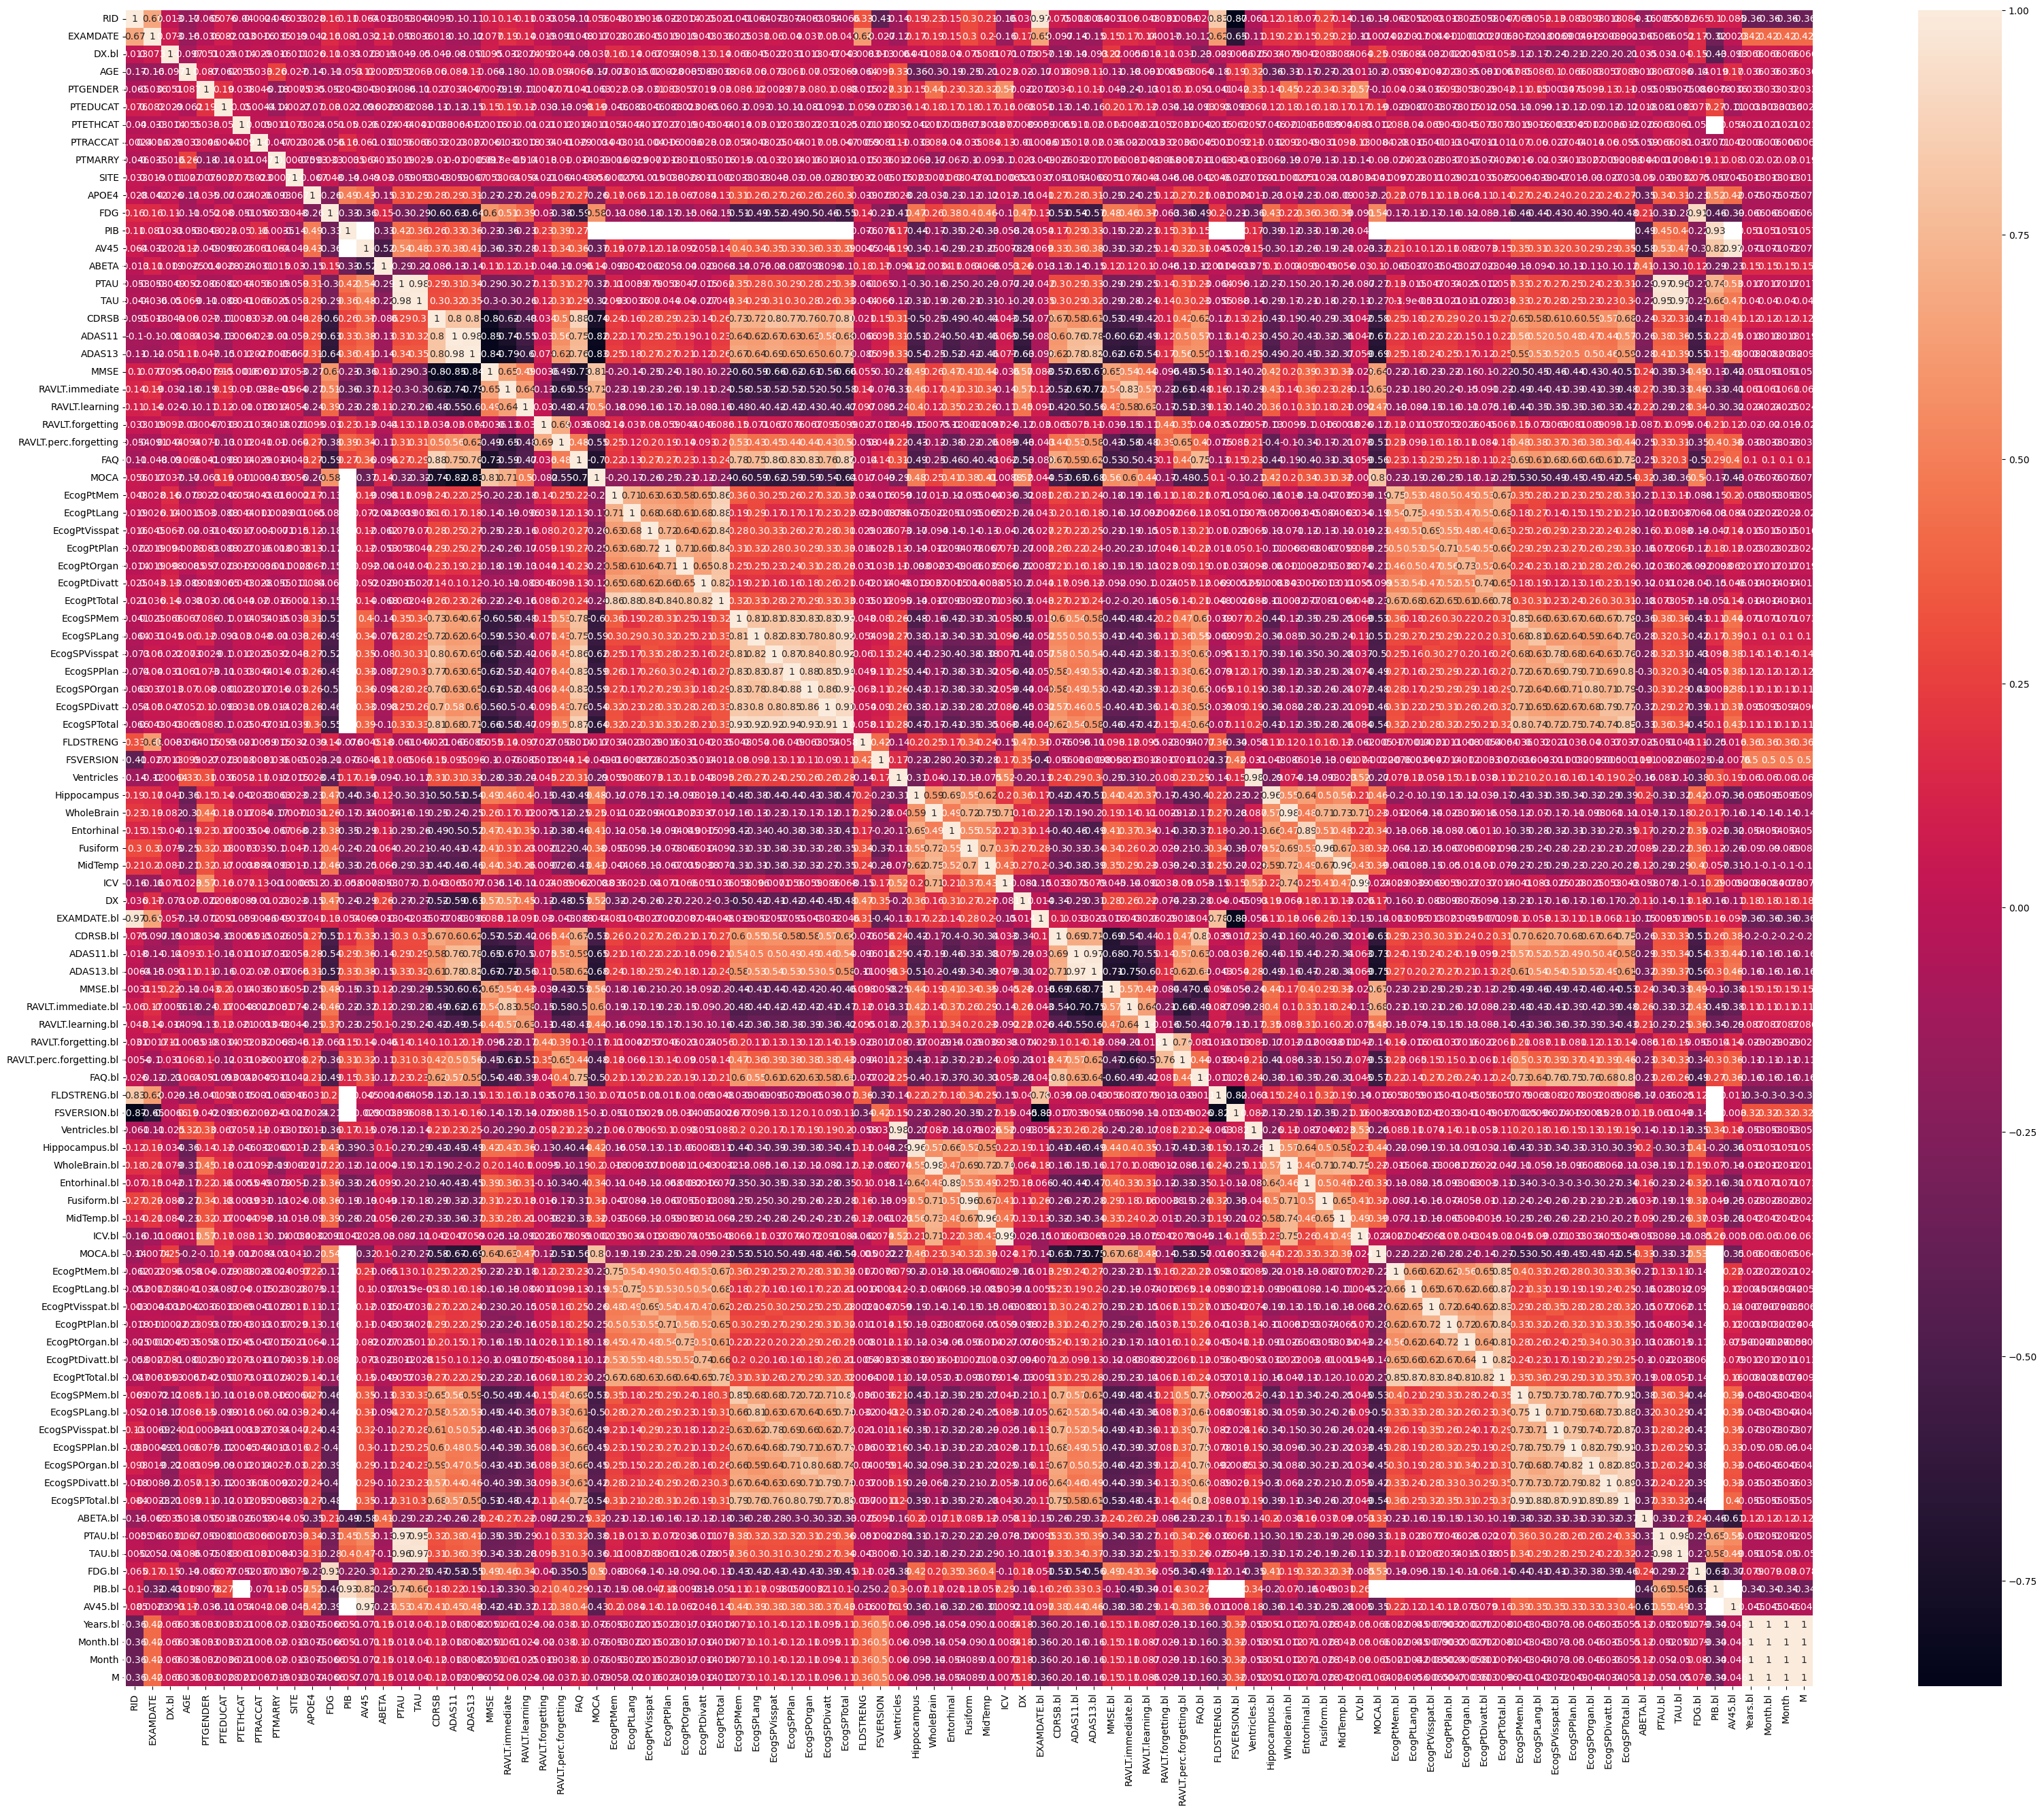

In [14]:
#look at heat map of factors
plt.figure(figsize=(40,32)) 
sns.heatmap(df_adnimergedata.corr(), annot=True)

In [6]:
#run Random Forest - this was propossed to be the best classifier for predictions
import time
t1 = time.perf_counter()
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
sc = rfc.score(X_test, y_test)
print("rfc_model score: ")
print(sc)

y_predict = rfc.predict(X_test)


cm = np.array(confusion_matrix(y_test, y_predict, labels=[1,2,3,4,5]))
confusion = pd.DataFrame(cm, index=['LMCI', 'CN', 'EMCI', 'AD', 'SMC'],
                         columns=['predicted_LMCI','predicted_CN', 'predicted_EMCI', 'predicted_AD', 'predicted_SMC'])
print(confusion)

t2 = time.perf_counter()
print('time taken to run:',t2-t1)


rfc_model score: 
0.995686274509804
      predicted_LMCI  predicted_CN  predicted_EMCI  predicted_AD  \
LMCI             775             0               1             0   
CN                 0           458               0             0   
EMCI               0             2             918             0   
AD                 5             3               0            69   
SMC                0             0               0             0   

      predicted_SMC  
LMCI              0  
CN                0  
EMCI              0  
AD                0  
SMC               0  
time taken to run: 4.616139996000015


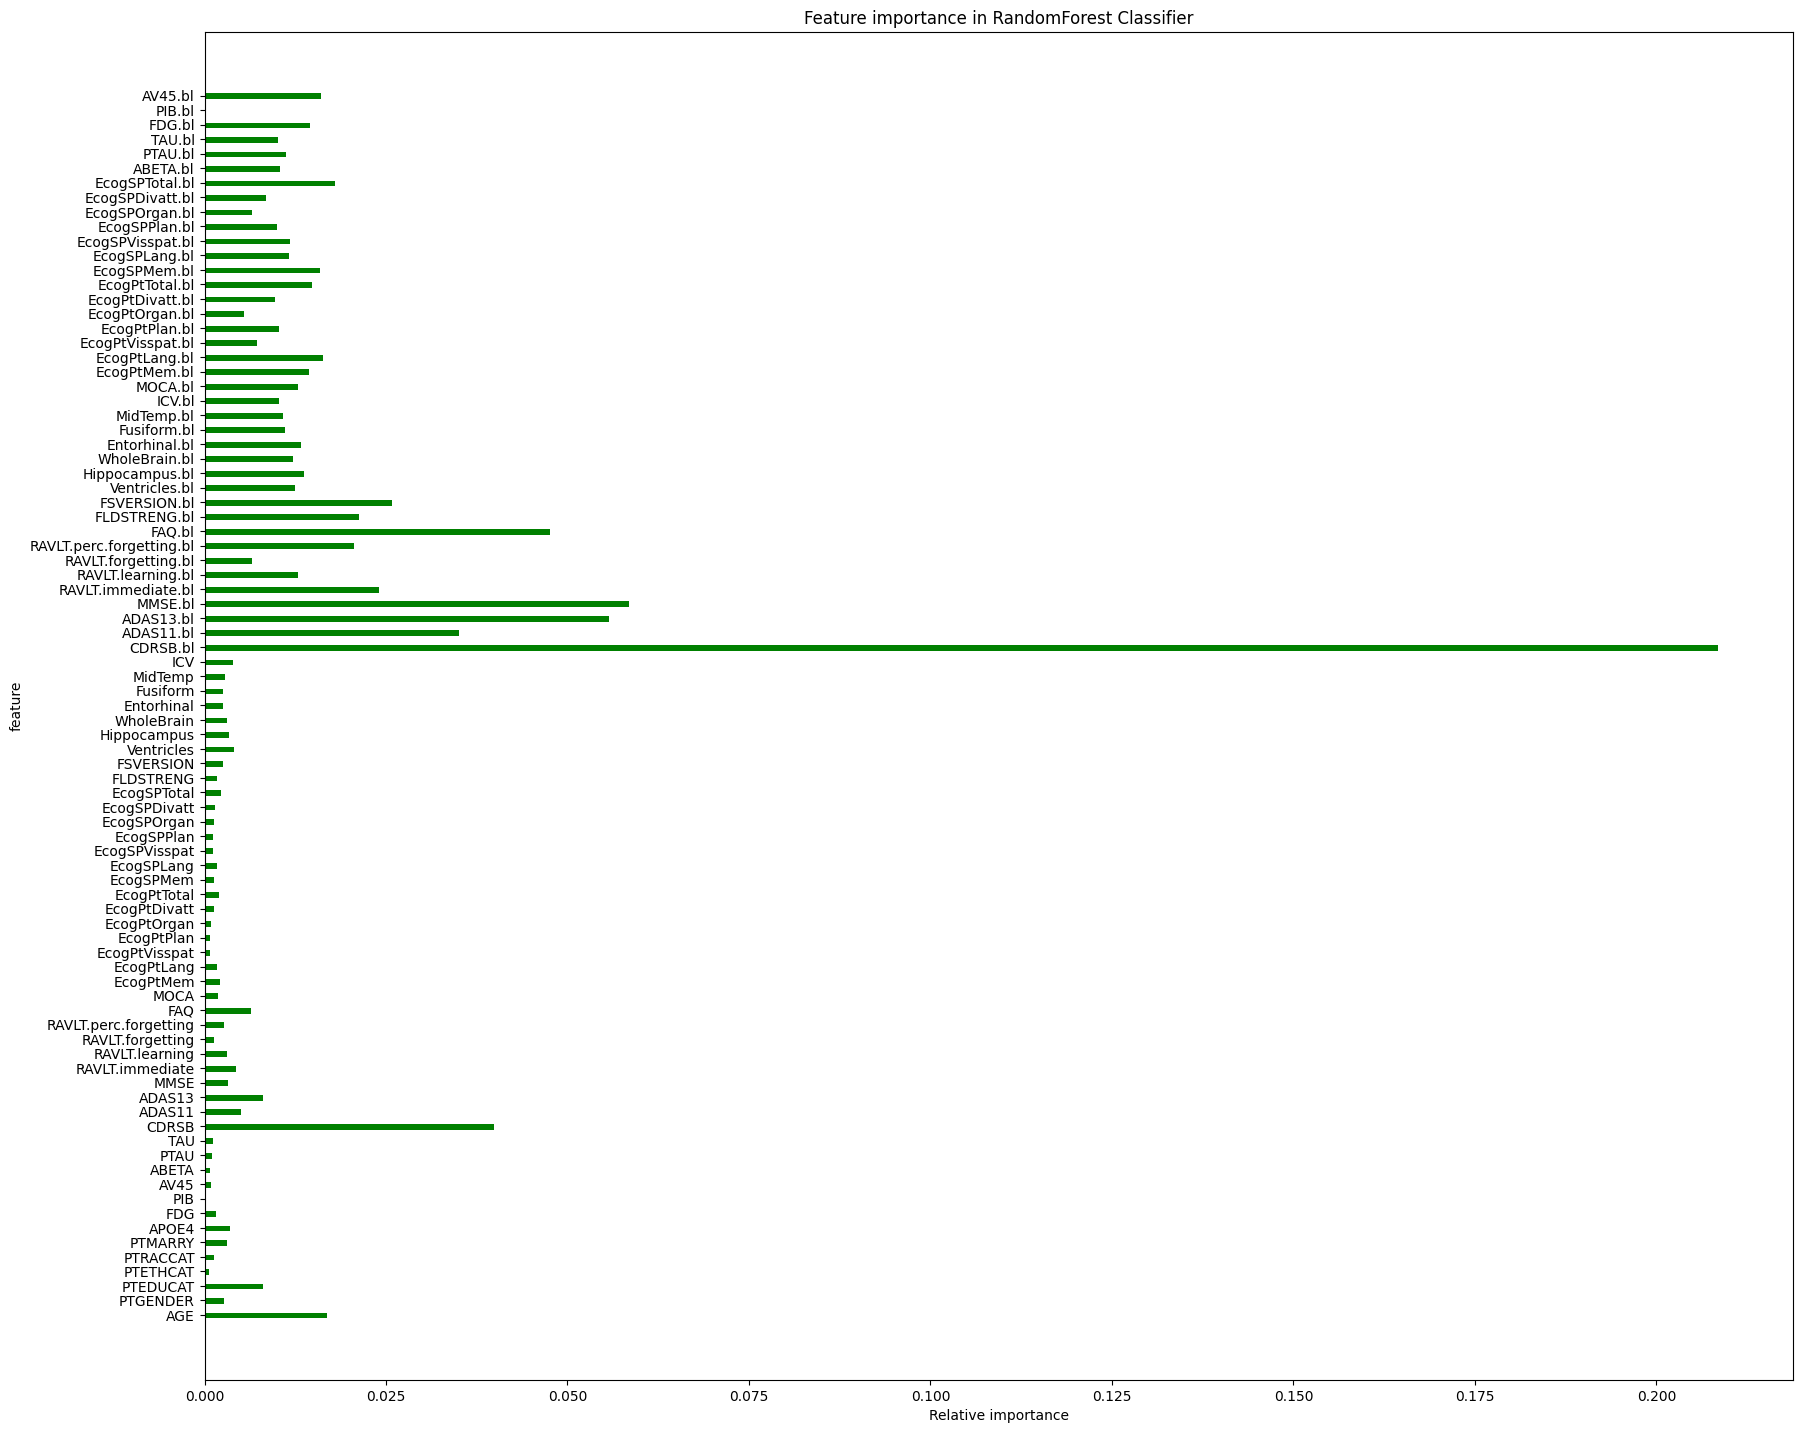

<Figure size 1500x1500 with 0 Axes>

In [7]:
col = ['AGE', 'PTGENDER', 'PTEDUCAT', 'PTETHCAT', 'PTRACCAT', 'PTMARRY',
       'APOE4', 'FDG', 'PIB', 'AV45', 'ABETA', 'PTAU', 'TAU', 'CDRSB',
       'ADAS11', 'ADAS13', 'MMSE', 'RAVLT.immediate', 'RAVLT.learning',
       'RAVLT.forgetting', 'RAVLT.perc.forgetting', 'FAQ', 'MOCA', 'EcogPtMem',
       'EcogPtLang', 'EcogPtVisspat', 'EcogPtPlan', 'EcogPtOrgan',
       'EcogPtDivatt', 'EcogPtTotal', 'EcogSPMem', 'EcogSPLang',
       'EcogSPVisspat', 'EcogSPPlan', 'EcogSPOrgan', 'EcogSPDivatt',
       'EcogSPTotal', 'FLDSTRENG', 'FSVERSION', 'Ventricles', 'Hippocampus',
       'WholeBrain', 'Entorhinal', 'Fusiform', 'MidTemp', 'ICV',
       'CDRSB.bl', 'ADAS11.bl', 'ADAS13.bl', 'MMSE.bl',
       'RAVLT.immediate.bl', 'RAVLT.learning.bl', 'RAVLT.forgetting.bl',
       'RAVLT.perc.forgetting.bl', 'FAQ.bl', 'FLDSTRENG.bl', 'FSVERSION.bl',
       'Ventricles.bl', 'Hippocampus.bl', 'WholeBrain.bl', 'Entorhinal.bl',
       'Fusiform.bl', 'MidTemp.bl', 'ICV.bl', 'MOCA.bl', 'EcogPtMem.bl',
       'EcogPtLang.bl', 'EcogPtVisspat.bl', 'EcogPtPlan.bl', 'EcogPtOrgan.bl',
       'EcogPtDivatt.bl', 'EcogPtTotal.bl', 'EcogSPMem.bl', 'EcogSPLang.bl',
       'EcogSPVisspat.bl', 'EcogSPPlan.bl', 'EcogSPOrgan.bl',
       'EcogSPDivatt.bl', 'EcogSPTotal.bl', 'ABETA.bl', 'PTAU.bl', 'TAU.bl',
       'FDG.bl', 'PIB.bl', 'AV45.bl']
#modelname.feature_importance_
y = rfc.feature_importances_
#plot
fig, ax = plt.subplots() 
width = 0.4 # the width of the bars 
ind = np.arange(len(y)) # the x locations for the groups
ax.barh(ind, y, width, color="green")
ax.set_yticks(ind+width/10)
ax.set_yticklabels(col, minor=False)
plt.title("Feature importance in RandomForest Classifier")
plt.xlabel("Relative importance")
plt.ylabel("feature") 
plt.figure(figsize=(15,15))
fig.set_size_inches(20.5, 17.5, forward=True)

In [8]:
#run SVM model
import time
t1 = time.perf_counter()
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix


svc_model = SVC(gamma='auto')
svc_model.fit(X_train, y_train)

sc = svc_model.score(X_test, y_test)
print("svc_model score: ")
print(sc)

y_predict = svc_model.predict(X_test)
cm = np.array(confusion_matrix(y_test, y_predict, labels=[1,2,3,4,5]))
confusion = pd.DataFrame(cm, index=['LMCI', 'CN', 'EMCI', 'AD', 'SMC'],
                         columns=['predicted_LMCI','predicted_CN', 'predicted_EMCI', 'predicted_AD', 'predicted_SMC'])
print(confusion)

t2 = time.perf_counter()
print('time taken to run:',t2-t1)


svc_model score: 
0.49137254901960786
      predicted_LMCI  predicted_CN  predicted_EMCI  predicted_AD  \
LMCI             245             0             531             0   
CN                 0            51             407             0   
EMCI               0             0             920             0   
AD                 0             0              76             1   
SMC                0             0               0             0   

      predicted_SMC  
LMCI              0  
CN                0  
EMCI              0  
AD                0  
SMC               0  
time taken to run: 27.850587037999958


In the above uses of the default classifier settings for Random Forest and SVM, the Random Forest out performed the SVM in non-binary predictions. Below, I'm testing how the classifiers perform with set parameters. The Tandom forest classifier performed the same, but the SVM model performed slightly worse. 

In [9]:
#run Random Forest - this was propossed to be the best classifier for predictions
import time
t1 = time.perf_counter()
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

rfc = RandomForestClassifier(criterion='gini',
                                n_estimators=25,
                                random_state=1,
                                n_jobs=2)
rfc.fit(X_train, y_train)
sc = rfc.score(X_test, y_test)
print("rfc_model score: ")
print(sc)

y_predict = rfc.predict(X_test)


cm = np.array(confusion_matrix(y_test, y_predict, labels=[1,2,3,4,5]))
confusion = pd.DataFrame(cm, index=['LMCI', 'CN', 'EMCI', 'AD', 'SMC'],
                         columns=['predicted_LMCI','predicted_CN', 'predicted_EMCI', 'predicted_AD', 'predicted_SMC'])
print(confusion)
t2 = time.perf_counter()
print('time taken to run:',t2-t1)

rfc_model score: 
0.9937254901960785
      predicted_LMCI  predicted_CN  predicted_EMCI  predicted_AD  \
LMCI             776             0               0             0   
CN                 0           458               0             0   
EMCI               0             3             917             0   
AD                 8             1               0            68   
SMC                0             0               0             0   

      predicted_SMC  
LMCI              0  
CN                0  
EMCI              0  
AD                0  
SMC               0  
time taken to run: 0.663921615000163


In [10]:
#run SVM model
import time
t1 = time.perf_counter()
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix


svc_model = SVC(kernel = 'rbf', gamma=0.10, C=10.0, random_state = 1)
svc_model.fit(X_train, y_train)

sc = svc_model.score(X_test, y_test)
print("svc_model score: ")
print(sc)

y_predict = svc_model.predict(X_test)
cm = np.array(confusion_matrix(y_test, y_predict, labels=[1,2,3,4,5]))
confusion = pd.DataFrame(cm, index=['LMCI', 'CN', 'EMCI', 'AD', 'SMC'],
                         columns=['predicted_LMCI','predicted_CN', 'predicted_EMCI', 'predicted_AD', 'predicted_SMC'])
print(confusion)

t2 = time.perf_counter()
print('time taken to run:',t2-t1)

svc_model score: 
0.4768627450980392
      predicted_LMCI  predicted_CN  predicted_EMCI  predicted_AD  \
LMCI             220             0             556             0   
CN                 0            42             416             0   
EMCI               0             0             920             0   
AD                 0             0              77             0   
SMC                0             0               0             0   

      predicted_SMC  
LMCI              0  
CN                0  
EMCI              0  
AD                0  
SMC               0  
time taken to run: 28.12166662499999


## Dropping all Clinical testing
Here I'm dropping all clinical exams and keeping only MRI and PET results. I will also maintain the Age and Education 

In [11]:
#DROP THE NaN
import numpy as np
from sklearn.impute import SimpleImputer

# We drop our "target" feature and use all the remaining features in our dataframe to train the model.
X = df_adnimergedata.drop(['RID', 'VISCODE', 'COLPROT', 'ORIGPROT', 'EXAMDATE', 'DX.bl', 'PTID',
       'SITE', 'CDRSB', 'ADAS11', 'ADAS13', 'MMSE', 'RAVLT.immediate', 'RAVLT.learning',
       'RAVLT.forgetting', 'RAVLT.perc.forgetting', 'FAQ', 'MOCA', 'EcogPtMem',
       'EcogPtLang', 'EcogPtVisspat', 'EcogPtPlan', 'EcogPtOrgan',
       'EcogPtDivatt', 'EcogPtTotal', 'EcogSPMem', 'EcogSPLang',
       'EcogSPVisspat', 'EcogSPPlan', 'EcogSPOrgan', 'EcogSPDivatt',
       'EcogSPTotal', 'DX', 'EXAMDATE.bl', 'CDRSB.bl', 'ADAS11.bl', 'ADAS13.bl', 'MMSE.bl',
       'RAVLT.immediate.bl', 'RAVLT.learning.bl', 'RAVLT.forgetting.bl',
       'RAVLT.perc.forgetting.bl', 'FAQ.bl', 'MOCA.bl', 'EcogPtMem.bl',
       'EcogPtLang.bl', 'EcogPtVisspat.bl', 'EcogPtPlan.bl', 'EcogPtOrgan.bl',
       'EcogPtDivatt.bl', 'EcogPtTotal.bl', 'EcogSPMem.bl', 'EcogSPLang.bl',
       'EcogSPVisspat.bl', 'EcogSPPlan.bl', 'EcogSPOrgan.bl',
       'EcogSPDivatt.bl', 'EcogSPTotal.bl', 'Years.bl', 'Month.bl', 'Month', 'M'], axis = 1)
 
y = df_adnimergedata['DX.bl']

imp = SimpleImputer(missing_values=np.nan, strategy='mean')
X = imp.fit_transform(X) #there are NaN in this array


#split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 20)


In [12]:
#run Random Forest - this was propossed to be the best classifier for predictions
import time
t1 = time.perf_counter()
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
sc = rfc.score(X_test, y_test)
print("rfc_model score: ")
print(sc)

y_predict = rfc.predict(X_test)


cm = np.array(confusion_matrix(y_test, y_predict, labels=[1,2,3,4,5]))
confusion = pd.DataFrame(cm, index=['LMCI', 'CN', 'EMCI', 'AD', 'SMC'],
                         columns=['predicted_LMCI','predicted_CN', 'predicted_EMCI', 'predicted_AD', 'predicted_SMC'])
print(confusion)

t2 = time.perf_counter()
print('time taken to run:',t2-t1)

rfc_model score: 
0.9901960784313726
      predicted_LMCI  predicted_CN  predicted_EMCI  predicted_AD  \
LMCI             774             0               2             0   
CN                 2           455               1             0   
EMCI               1             0             918             0   
AD                 3             2               2            70   
SMC                0             0               0             0   

      predicted_SMC  
LMCI              0  
CN                0  
EMCI              0  
AD                0  
SMC               0  
time taken to run: 6.695383435999929


In [ ]:
col = ['AGE', 'PTGENDER', 'PTEDUCAT', 'PTETHCAT', 'PTRACCAT',
                      'PTMARRY', 'APOE4', 'FDG', 'PIB', 'AV45', 'ABETA',
                     'PTAU', 'TAU', 'FLDSTRENG', 'FSVERSION', 'Ventricles',
                     'Hippocampus',  'WholeBrain', 'Entorhinal', 'Fusiform',
                     'MidTemp', 'ICV', 'FLDSTRENG.bl', 'FSVERSION.bl',
                     'Ventricles.bl', 'Hippocampus.bl', 'WholeBrain.bl',
                     'Entorhinal.bl',  'Fusiform.bl', 'MidTemp.bl', 'ICV.bl',
                     'ABETA.bl', 'PTAU.bl', 'TAU.bl', 'FDG.bl', 'PIB.bl', 'AV45.bl']
#modelname.feature_importance_
y = rfc.feature_importances_
#plot
fig, ax = plt.subplots() 
width = 0.4 # the width of the bars 
ind = np.arange(len(y)) # the x locations for the groups
ax.barh(ind, y, width, color="green")
ax.set_yticks(ind+width/10)
ax.set_yticklabels(col, minor=False)
plt.title("Feature importance in RandomForest Classifier")
plt.xlabel("Relative importance")
plt.ylabel("feature") 
plt.figure(figsize=(15,15))
fig.set_size_inches(20.5, 17.5, forward=True)

In [ ]:
#run Random Forest - this was propossed to be the best classifier for predictions
import time
t1 = time.perf_counter()
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

rfc = RandomForestClassifier(criterion='gini',
                                n_estimators=25,
                                random_state=1,
                                n_jobs=2)
rfc.fit(X_train, y_train)
sc = rfc.score(X_test, y_test)
print("rfc_model score: ")
print(sc)

y_predict = rfc.predict(X_test)


cm = np.array(confusion_matrix(y_test, y_predict, labels=[1,2,3,4,5]))
confusion = pd.DataFrame(cm, index=['LMCI', 'CN', 'EMCI', 'AD', 'SMC'],
                         columns=['predicted_LMCI','predicted_CN', 'predicted_EMCI', 'predicted_AD', 'predicted_SMC'])
print(confusion)

t2 = time.perf_counter()
print('time taken to run:',t2-t1)

rfc_model score: 
0.9858823529411764
      predicted_LMCI  predicted_CN  predicted_EMCI  predicted_AD  \
LMCI             772             2               2             0   
CN                 3           455               0             0   
EMCI               1             0             917             0   
AD                 6             7               0            64   
SMC                0             0               0             0   

      predicted_SMC  
LMCI              0  
CN                0  
EMCI              0  
AD                0  
SMC               0  
time taken to run: 0.5733933159999651


In [ ]:
#run SVM model
import time
t1 = time.perf_counter()
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix


svc_model = SVC(gamma='auto', kernel="rbf")
svc_model.fit(X_train, y_train)

sc = svc_model.score(X_test, y_test)
print("svc_model score: ")
print(sc)

y_predict = svc_model.predict(X_test)
cm = np.array(confusion_matrix(y_test, y_predict, labels=[1,2,3,4,5]))
confusion = pd.DataFrame(cm, index=['LMCI', 'CN', 'EMCI', 'AD', 'SMC'],
                         columns=['predicted_LMCI','predicted_CN', 'predicted_EMCI', 'predicted_AD', 'predicted_SMC'])
print(confusion)

t2 = time.perf_counter()
print('time taken to run:',t2-t1)


svc_model score: 
0.5580392156862745
      predicted_LMCI  predicted_CN  predicted_EMCI  predicted_AD  \
LMCI             309             0             467             0   
CN                 0           128             330             0   
EMCI               0             0             920             0   
AD                 0             0              65            12   
SMC                0             0               0             0   

      predicted_SMC  
LMCI              0  
CN                0  
EMCI              0  
AD                0  
SMC               0  
time taken to run: 19.805713764999382
